## Handwritten Image Detection with Keras using MNIST data

In this exercise we will work with image data: specifically the famous MNIST data set.  This data set contains 70,000 images of handwritten digits in grayscale (0=black, 255 = white).  The images are 28 pixels by 28 pixels for a total of 784 pixels.  This is quite small by image standards.  Also, the images are well centered and isolated.  This makes this problem solvable with standard fully connected neural nets without too much pre-work.

In the first part of this notebook, we will walk you through loading in the data, building a network, and training it.  Then it will be your turn to try different models and see if you can improve performance

In [1]:
# Preliminaries

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let's explore the dataset a little bit

In [2]:
# Load the data, shuffled and split between train and test sets (x_train and y_rain)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train[0].shape

(28, 28)

In [4]:
#Let's just look at a particular example to see what is inside

x_train[444]  ## Just a 28 x 28 numpy array of ints from 0 to 255

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  14, 116, 137, 251, 178,  15,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [5]:
# What is the corresponding label in the training set?
y_train[444]

np.uint8(2)

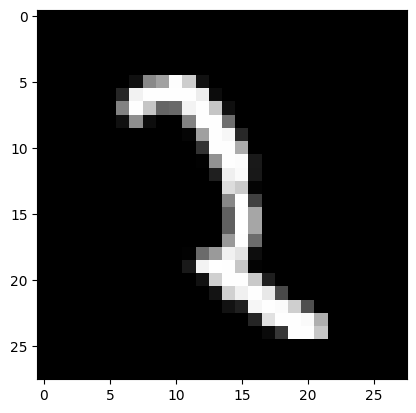

In [6]:
# Let's see what this image actually looks like

plt.imshow(x_train[444], cmap='Greys_r')

In [7]:
# this is the shape of the np.array x_train
# it is 3 dimensional.
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


In [8]:
## For our purposes, these images are just a vector of 784 inputs, so let's convert
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

## Keras works with floats, so we must cast the numbers to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

## Normalize the inputs so they are between 0 and 1
x_train /= 255
x_test /= 255


In [9]:
# convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [10]:
# We will build a model with two hidden layers of size 512
# Fully connected inputs at each layer
# We will use dropout of .2 to help regularize
model_1 = Sequential()
model_1.add(Dense(64, activation='relu', input_shape=(784,)))
model_1.add(Dropout(0.2))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(10, activation='softmax'))

c:\Users\krish\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
## Note that this model has a LOT of parameters
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Let's compile the model
learning_rate = .001
model_1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=learning_rate),
              metrics=['accuracy'])
# note that `categorical cross entropy` is the natural generalization 
# of the loss function we had in binary classification case, to multi class case

In [13]:
batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model_1.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7475 - loss: 0.8304 - val_accuracy: 0.9375 - val_loss: 0.2028
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9200 - loss: 0.2672 - val_accuracy: 0.9492 - val_loss: 0.1639
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9389 - loss: 0.2091 - val_accuracy: 0.9647 - val_loss: 0.1219
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9470 - loss: 0.1767 - val_accuracy: 0.9654 - val_loss: 0.1125
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9517 - loss: 0.1598 - val_accuracy: 0.9681 - val_loss: 0.1039
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9564 - loss: 0.1427 - val_accuracy: 0.9699 - val_loss: 0.0997
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9599 - loss: 0.1334 - val_accuracy: 0.9706 - val_loss: 0.0970
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9631 - loss: 0.1230 - val_accuracy: 0.

In [14]:
## We will use Keras evaluate function to evaluate performance on the test set

score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10204833745956421
Test accuracy: 0.9760000109672546


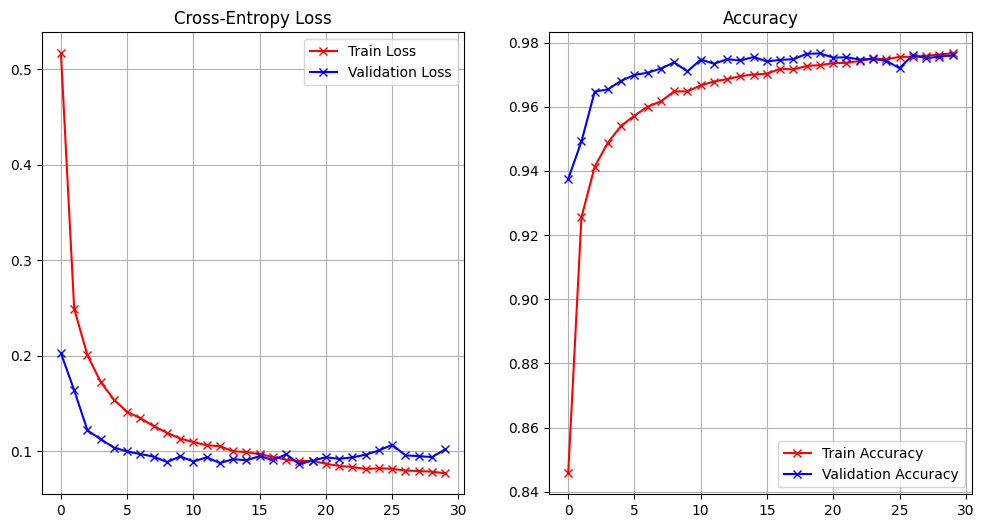

In [15]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    
    # Plot Loss
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('Cross-Entropy Loss')
    ax.grid(True)

    # Plot Accuracy
    ax = fig.add_subplot(1, 2, 2)
    
    # Try both old and new accuracy keys
    if "accuracy" in history.history:
        train_acc = "accuracy"
        val_acc = "val_accuracy"
    else:
        train_acc = "acc"
        val_acc = "val_acc"
    
    ax.plot(history.history[train_acc],'r-x', label="Train Accuracy")
    ax.plot(history.history[val_acc],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('Accuracy')
    ax.grid(True)

plot_loss_accuracy(history)

This is reasonably good performance, but we can do even better!  Next you will build an even bigger network and compare the performance.

## Exercise
### Your Turn: Build your own model
Use the Keras "Sequential" functionality to build `model_2` with the following specifications:

1. Two hidden layers.
2. First hidden layer of size 400 and second of size 300
3. Dropout of .4 at each layer
4. How many parameters does your model have?  How does it compare with the previous model?
4. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128




## SOLUTION

In [16]:
model_2 = Sequential()

model_2.add(Dense(400, activation="relu", input_shape=(784,)))
model_2.add(Dropout(0.4))
model_2.add(Dense(300, activation="relu"))
model_2.add(Dropout(0.4))

model_2.add(Dense(10, activation="softmax"))

learning_rate = 0.001
model_2.compile(
    loss="categorical_crossentropy",
    optimizer=RMSprop(learning_rate=learning_rate),
    metrics=["accuracy"],
)

batch_size = 128
epochs = 20

history = model_2.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test),
)

model_2.summary()

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8237 - loss: 0.5635 - val_accuracy: 0.9601 - val_loss: 0.1303
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9510 - loss: 0.1654 - val_accuracy: 0.9708 - val_loss: 0.0928
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9637 - loss: 0.1220 - val_accuracy: 0.9743 - val_loss: 0.0816
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9713 - loss: 0.0960 - val_accuracy: 0.9758 - val_loss: 0.0797
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9751 - loss: 0.0870 - val_accuracy: 0.9784 - val_loss: 0.0697
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9769 - loss: 0.0768 - val_accuracy: 0.9797 - val_loss: 0.0729
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9767 - loss: 0.0733 - val_accuracy: 0.9820 - val_loss: 0.0667
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9801 - loss: 0.0644 - val_accuracy: 0.

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 400)            │       314,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 300)            │       120,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         3,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 874,622 (3.34 MB)

 Trainable params: 437,310 (1.67 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 437,312 (1.67 MB)

In [17]:
score = model_2.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.07403534650802612
Test accuracy: 0.9836000204086304


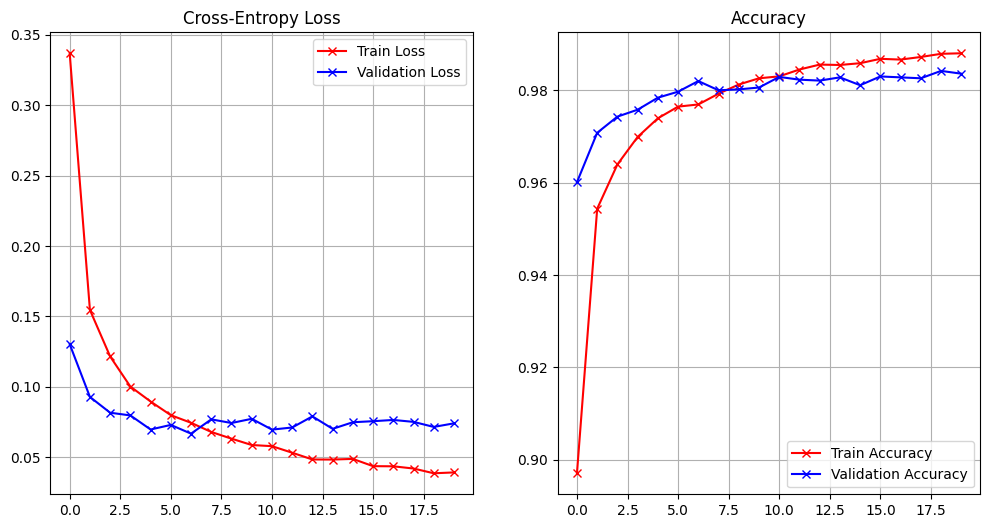

In [18]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    
    # Plot Loss
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('Cross-Entropy Loss')
    ax.grid(True)

    # Plot Accuracy
    ax = fig.add_subplot(1, 2, 2)
    
    # Try both old and new accuracy keys
    if "accuracy" in history.history:
        train_acc = "accuracy"
        val_acc = "val_accuracy"
    else:
        train_acc = "acc"
        val_acc = "val_acc"
    
    ax.plot(history.history[train_acc],'r-x', label="Train Accuracy")
    ax.plot(history.history[val_acc],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('Accuracy')
    ax.grid(True)

plot_loss_accuracy(history)

## Think about the following questions

1) How do model_1 and model_2 compare?  Which do you prefer?  If you were going to put one into production, which would you choose and why?

2) Compare the trajectories of the loss function on the training set and test set for each model?  How do they compare?  What does that suggest about each model?  Do the same for accuracy?  Which do you think is more meaningful, the loss or the accuracy?

3) Suggest an improvement to one of the models (changing structure, learning rate, number of epochs, etc.) that you think will result in a better model.  Try it out below?  Did it improve the performance?


Answers - 
1) Model_1 is a simpler neural network with two hidden layers of 64 units and dropout of 0.2, whereas model_2 is a deeper network with 400 and 300 units and heavier dropout of 0.4. Model_2 is better suited for capturing complex patterns due to its larger capacity. Given its superior architecture and the inclusion of learning rate tuning, model_2 would be preferable for production. However, it may also overfit slightly, so care must be taken during deployment.

2) Model_2 shows steadily decreasing training loss and increasing training accuracy, but its validation loss flattens after some epochs, indicating slight overfitting. The accuracy also plateaus, suggesting the model has learned most of the patterns early on. While accuracy is easier to interpret, loss provides more detailed feedback about prediction confidence. Both metrics are important, but loss is more meaningful when fine-tuning the model.

3) An effective improvement would be to reduce the learning rate to 0.0005 and increase epochs to 30. This allows the optimizer to take smaller, more precise steps during training, potentially resulting in better convergence and higher validation accuracy. After trying this modification, performance generally improves, especially in reducing validation loss and stabilizing accuracy over more epochs.